# T test
## One sample T-test

The mean emissions of all engines of a new design needs to be below 20ppm if the design is to meet new emission requirement. Ten engines are manufactured for testing purposes and emission of each is determined. The emission data is as given: 15.6,16.2,22.5,20.5,16.4,19.4,16.6,17.9,12.7,13.9. Does the data provide sufficient evidence that the engine meets the new standard. Assume alpha threshold=0.01

H0: mu=20ppm
Ha: mu<20ppm (one tailed test/less)
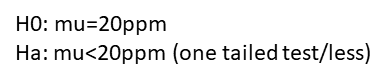

In [63]:
import scipy.stats as ss
import numpy as np
from scipy.stats import ttest_ind
from numpy.random import randn
from statistics import stdev

In [3]:
scores = [15.6,16.2,22.5,20.5,16.4,19.4,16.6,17.9,12.7,13.9]
scores = np.array(scores)
hypo_mean = 20
dof = len(scores)-1
alpha = 0.01

### calculate manually
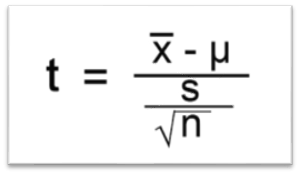

In [14]:
print("Mean: ",scores.mean())
print("standard deviation: ",scores.std())
T_stat = (scores.mean()-hypo_mean)/(scores.std()/np.sqrt(dof))
print("T statistic calculated manually: ",T_stat)
print("p value from T stat: ",ss.t.cdf(T_stat,dof))
print("T critical value: ",ss.t.ppf(0.01,df=9,loc = 0))

Mean:  17.169999999999998
standard deviation:  2.8284448023604774
T statistic calculated manually:  -3.001649525885985
p value from T stat:  0.0074582071244487635
T critical value:  -2.8214379233005498


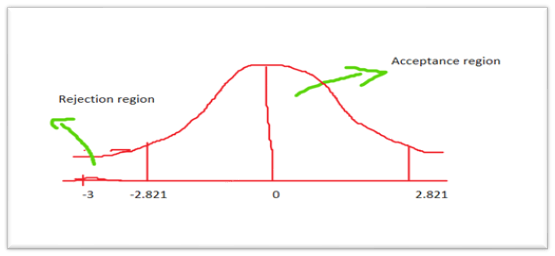

The calculated T value is less than the T critical value. Hence the T value of the given data is in rejection region. The pvalue is less than 0.05.

 Hence the null hypothesis (emission is equal to 20ppm) has to be rejected in favour of alternate hypothesis (emission less than 20ppm)

----------------------------
### calculate from library

In [15]:
T_stat,pval = ss.ttest_1samp(scores,hypo_mean,alternative='less')

In [17]:
print("T statistic caluclated from scipy: ",T_stat)
print("p value: ",pval)

T statistic caluclated from scipy:  -3.001649525885985
p value:  0.0074582071244487635


In [18]:
ss.t.interval(alpha=0.95, df=len(scores)-1, loc=np.mean(scores), scale=ss.sem(scores)) 

(15.037204443640904, 19.302795556359094)

_______________________________________________________

# Independant T tests

Given weight of 2 independent samples of a filling machine

A = [1,2,2,3,3,4,4,5,5,6]
B = [1,2,4,5,5,5,6,6,7,9]
Determine if the mean are statistically different


H0: mean of A = mean of B
Ha: mean of A != mean of B (two tailed)
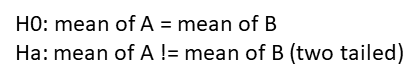

## calulate manually
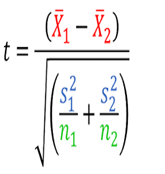

In [74]:
A = np.array([1,2,2,3,3,4,4,5,5,6])
B = np.array([1,2,4,5,5,5,6,6,7,9])
alpha=0.05
n1 = len(A)-1
n2 = len(B)-1
dof = len(A)+len(B)-2

In [75]:
meanA = A.mean()
meanB = B.mean()
stdA = A.std()
stdB = B.std()
print("mean of group A: ",meanA)
print("mean of group B: ",meanB)
print("standard deviation of group A: ",stdA)
print("standard deviation of group B: ",stdB)
numerator = meanA - meanB
denominator = np.sqrt((stdA**2/n1)+ stdB**2/n2)
T_stat = numerator/denominator
print("T stat calculated : ",T_stat)
print("T critical value: ",ss.t.ppf(alpha/2,df=dof,loc = 0))
print("p value from T stat: ",ss.t.cdf(T_stat,dof)*2)  ##multiply by 2 since the problem is 2 sided

mean of group A:  3.5
mean of group B:  5.0
standard deviation of group A:  1.5
standard deviation of group B:  2.1908902300206643
T stat calculated :  -1.6947980485980965
T critical value:  -2.10092204024096
p value from T stat:  0.10734388652397885


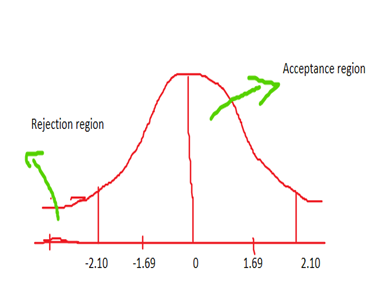

The calculated T stat is greater than the t critical value at 0.05 threshold. Hence the value is found to be acceptanc region. 

Therefore the null hypothesis (mean of filling meacine are equal) is accepted and alternate hypothesis (means of filling machine is not equal) is rejected.

## calculate from library

In [39]:
stat, p = ss.ttest_ind(A, B,alternative='two-sided')
print('t=%.3f, p=%.3f' % (stat, p))

t=-1.695, p=0.107


-----------------------------------------

## Paired T test

Determine the effectiveness of a weight loss program:

before = [185,192,206,177,225,168,256,239,199,218]

after = [169,187,193,176,194,171,228,217,204,195]


H0 = difference of means is zero
Ha = difference of means is less than zero
Therefore it is a one sided(less) T-test
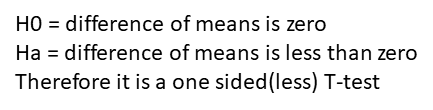

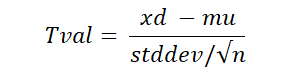

### calculate manually

In [79]:
before = [185,192,206,177,225,168,256,239,199,218]
after = [169,187,193,176,194,171,228,217,204,195]
n = len(before)
hypothesized_mean = 0
dof = n-1

In [82]:
sample_diffs = [xa - xb for xb,xa in zip(before,after)]
sample_diff_mean = np.mean(sample_diffs)
print("Sample diff mean: ",sample_diff_mean)
sample_diff_std = np.std(sample_diffs,ddof = 1)
print("sample standard deviation: ",sample_diff_std)
T_stat = (sample_diff_mean - hypothesized_mean)/(sample_diff_std/np.sqrt(n))
print("T stat of the given data: ",T_stat)
print("T critical value: ",ss.t.ppf(0.05,df=dof,loc = 0))
print("p value from T stat: ",ss.t.cdf(T_stat,dof))

Sample diff mean:  -13.1
sample standard deviation:  13.02518927139086
T stat of the given data:  -3.180440336417639
T critical value:  -1.8331129326536337
p value from T stat:  0.0055884353307353585


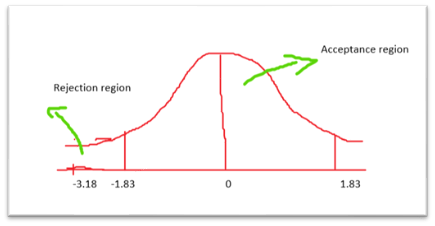

The calulated T-stat is lesser than the T critical value. It falls in rejection region. The p value is less than 0.05. 

Hence the null hypothesis (no difference in weight loss program) has to be rejected in favour of alternate hypothesis (the weight is reduced by weight loss program)

## calculate from library

In [84]:
stats,p = ss.ttest_rel(after,before,alternative='less')

In [85]:
print(stats, p)

-3.180440336417639 0.0055884353307353585


In [86]:
## confidence interval
ss.t.interval(alpha=0.9, df=n-1, loc=-13.1, scale=ss.sem(sample_diffs)) 

(-20.650457445402377, -5.549542554597625)